In [1]:
import pandas as pd
import joblib
import re

In [2]:
def calculate_average_atomic_mass(molecular_formula):
    # Define mass
    average_atomic_masses = {'H': 1.007825, 'C': 12.000000, 'O':15.994915}
    # Calculate atomic mass from molecular formula
    elements_with_counts = re.findall(r'([A-Z][a-z]*)(\d*)', molecular_formula)
    element_counts = {element[0]: int(element[1]) if element[1] else 1 for element in elements_with_counts}
    average_atomic_mass = sum(element_counts[element] * average_atomic_masses[element] for element in element_counts)
    return average_atomic_mass
    
def cal_mod(averagemz):
    num = ((averagemz % calculate_average_atomic_mass('CH2')) % calculate_average_atomic_mass('H2')) % (calculate_average_atomic_mass('H14') % calculate_average_atomic_mass('CH2')) 
    return num

In [3]:
def create_pred_class(row):
    classes = [f"{col}:{round(value, 3)}" for col, value in sorted(row.items(), key=lambda x: x[1], reverse=True) if value >= 0.01] #1%
    return ','.join(classes)

def check_ontology_in_pred_class(row):
    ontology = row['correctclass']
    predclass = row['predclass']
    return ontology in predclass

def cal_accscore(df, loaded_model, number_to_class):

    X1_test = df.drop(columns=columns_to_drop).values
    y1_test = df['Ontology']

    y_pred_test = loaded_model.predict_proba(X1_test)
    df_predres = pd.DataFrame(y_pred_test).rename(columns=number_to_class)
    df_predres['pred1st'] = df_predres.idxmax(axis=1)
    df_predres['predclass'] = df_predres.drop('pred1st', axis=1).apply(create_pred_class, axis=1)
    df_predres['prednumber'] = df_predres['predclass'].apply(lambda x: len(x.split(',')))

    df_result = df_predres[['pred1st', 'predclass', 'prednumber']].\
        merge(pd.DataFrame(y1_test).reset_index(drop=True).rename(columns={'Ontology':'correctclass'}), left_index=True, right_index=True)

    df_result['candidates'] = df_result.apply(check_ontology_in_pred_class, axis=1)

    all_pos = len(df_result)
    pred1st_pos = len(df_result[df_result['pred1st'] == df_result['correctclass']])
    candidates_pos = len(df_result[df_result['candidates'] == True]) - pred1st_pos
    false_pos = len(df_result[df_result['candidates'] == False])
    list = [pred1st_pos, candidates_pos, false_pos]

    return list, df_result

pos

In [4]:
df_pos = pd.read_csv('../../data/RLdata/df_RLtable_pos.csv')
df_pos['MCHvalue'] = cal_mod(df_pos['AverageMz'])

loaded_model_pos = joblib.load('../../data/model_comp/pos_pred_result/best_xgb_model_random_pos.joblib')
label_encoder_pos = joblib.load('../../data/model_comp/pos_pred_result/label_encoder_pos_random.pkl')
number_to_class_pos = {index: label for index, label in enumerate(label_encoder_pos.classes_)}
df_feature_pos = pd.read_csv('../../data/model_comp/pos_pred_result/df_feature_pos.csv')

columns_to_drop = ['Metabolitename', 'Ontology', 'dataset', 'AlignmentID', 'AverageMz']

df_pos2 = df_pos[df_pos['Ontology'].isin(label_encoder_pos.classes_.tolist())].set_index(columns_to_drop)[df_feature_pos.feature].reset_index()

In [5]:
dataset_difC_pos = df_pos2[df_pos2['dataset'].between(1, 11)].reset_index(drop=True)
dataset_waters_pos = df_pos2[df_pos2['dataset'].isin([78])].reset_index(drop=True)
dataset_thermo_pos = df_pos2[df_pos2['dataset'].isin([79])].reset_index(drop=True)
dataset_agilent_pos = df_pos2[df_pos2['dataset'].isin([80])].reset_index(drop=True)
dataset_bruker_pos = df_pos2[df_pos2['dataset'].isin([83,84])].reset_index(drop=True)
dataset_sciex66swath_pos = df_pos2[df_pos2['dataset'].isin([81])].reset_index(drop=True)

In [6]:
difC_res_list_pos, df_pred_difC_pos = cal_accscore(dataset_difC_pos, loaded_model_pos, number_to_class_pos)
waters_res_list_pos, df_pred_waters_pos = cal_accscore(dataset_waters_pos, loaded_model_pos, number_to_class_pos)
thermo_res_list_pos, df_pred_thermo_pos = cal_accscore(dataset_thermo_pos, loaded_model_pos, number_to_class_pos)
agilent_res_list_pos, df_pred_agilent_pos = cal_accscore(dataset_agilent_pos, loaded_model_pos, number_to_class_pos)
bruker_res_list_pos, df_pred_bruker_pos = cal_accscore(dataset_bruker_pos, loaded_model_pos, number_to_class_pos)
sciex66swath_res_list_pos, df_pred_sciex66swath_pos = cal_accscore(dataset_sciex66swath_pos, loaded_model_pos, number_to_class_pos)

neg

In [7]:
df_neg = pd.read_csv('../../data/RLdata/df_RLtable_neg.csv')
df_neg['MCHvalue'] = cal_mod(df_neg['AverageMz'])

loaded_model_neg = joblib.load('../../data/model_comp/neg_pred_result/best_xgb_model_random_neg.joblib')
label_encoder_neg = joblib.load('../../data/model_comp/neg_pred_result/label_encoder_neg_random.pkl')
number_to_class_neg = {index: label for index, label in enumerate(label_encoder_neg.classes_)}
df_feature_neg = pd.read_csv('../../data/model_comp/neg_pred_result/df_feature_neg.csv')

columns_to_drop = ['Metabolitename', 'Ontology', 'dataset', 'AlignmentID', 'AverageMz']

df_neg2 = df_neg[df_neg['Ontology'].isin(label_encoder_neg.classes_.tolist())].set_index(columns_to_drop)[df_feature_neg.feature].reset_index()

In [8]:
dataset_difC_neg = df_neg2[df_neg2['dataset'].between(1, 11)].reset_index(drop=True)
dataset_waters_neg = df_neg2[df_neg2['dataset'].isin([78])].reset_index(drop=True)
dataset_thermo_neg = df_neg2[df_neg2['dataset'].isin([79])].reset_index(drop=True)
dataset_agilent_neg = df_neg2[df_neg2['dataset'].isin([80])].reset_index(drop=True)
dataset_bruker_neg = df_neg2[df_neg2['dataset'].isin([83,84])].reset_index(drop=True)
dataset_sciex66swath_neg = df_neg2[df_neg2['dataset'].isin([81])].reset_index(drop=True)

In [9]:
difC_res_list_neg, df_pred_difC_neg = cal_accscore(dataset_difC_neg, loaded_model_neg, number_to_class_neg)
waters_res_list_neg, df_pred_waters_neg = cal_accscore(dataset_waters_neg, loaded_model_neg, number_to_class_neg)
thermo_res_list_neg, df_pred_thermo_neg = cal_accscore(dataset_thermo_neg, loaded_model_neg, number_to_class_neg)
agilent_res_list_neg, df_pred_agilent_neg = cal_accscore(dataset_agilent_neg, loaded_model_neg, number_to_class_neg)
bruker_res_list_neg, df_pred_bruker_neg = cal_accscore(dataset_bruker_neg, loaded_model_neg, number_to_class_neg)
sciex66swath_res_list_neg, df_pred_sciex66swath_neg = cal_accscore(dataset_sciex66swath_neg, loaded_model_neg, number_to_class_neg)

fig

In [10]:
df_pos_res = pd.DataFrame([difC_res_list_pos, waters_res_list_pos, thermo_res_list_pos, agilent_res_list_pos, bruker_res_list_pos, sciex66swath_res_list_pos],\
     columns=['pred1st', 'candidate', 'false'],\
     index=['Different curator', 'Waters XevoG2 QTOF', 'Thermo Q Exactive Plus', 'Agilent 6546 QTOF', 'Bruker timsTOF Pro', 'Sciex TripleTOF 6600(SWATH)'])

df_neg_res = pd.DataFrame([difC_res_list_neg, waters_res_list_neg, thermo_res_list_neg, agilent_res_list_neg, bruker_res_list_neg, sciex66swath_res_list_neg],\
     columns=['pred1st', 'candidate', 'false'],\
     index=['Different curator', 'Waters XevoG2 QTOF', 'Thermo Q Exactive Plus', 'Agilent 6546 QTOF', 'Bruker timsTOF Pro', 'Sciex TripleTOF 6600(SWATH)'])

df_pos_res['sum'] = df_pos_res.sum(axis=1)
df_neg_res['sum'] = df_neg_res.sum(axis=1)

df_pos_res['Correct'] = (df_pos_res['pred1st'] / df_pos_res['sum'])*100
df_pos_res['Listed in candidates'] = (df_pos_res['candidate'] / df_pos_res['sum'])*100
df_pos_res['Incorrect'] = (df_pos_res['false'] / df_pos_res['sum'])*100

df_neg_res['Correct'] = (df_neg_res['pred1st'] / df_neg_res['sum'])*100
df_neg_res['Listed in candidates'] = (df_neg_res['candidate'] / df_neg_res['sum'])*100
df_neg_res['Incorrect'] = (df_neg_res['false'] / df_neg_res['sum'])*100

In [13]:
df_pos_res[['pred1st', 'sum']].sum()

pred1st    4108
sum        4594
dtype: int64

In [12]:
df_neg_res[['pred1st', 'sum']].sum()

pred1st    3720
sum        4382
dtype: int64

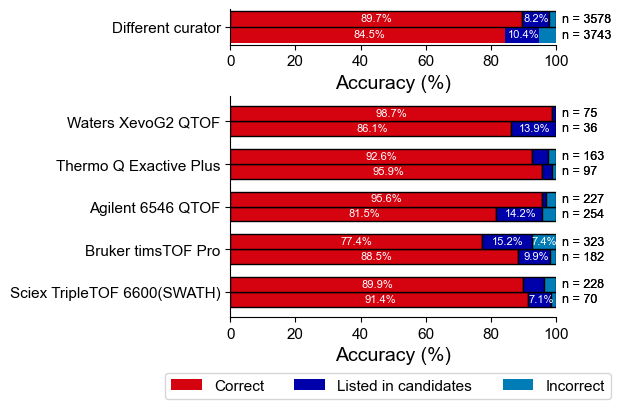

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

arial_path = '../../arial.ttf'
arial = fm.FontProperties(fname=arial_path, size=11)

deep_palette = ['#d50310ff', '#0000aaff', '#007cb6ff']
fig, ax = plt.subplots(2,1,figsize=(4.2, 4), gridspec_kw={'height_ratios': [0.8,5], 'hspace': 0.4})

### 1
width = 0.35  
df_all_neg1 = df_neg_res.iloc[:1, :]
df_all_pos1 = df_pos_res.iloc[:1, :]
y1 = np.arange(len(df_all_neg1))

line1_1, = ax[0].barh(y1 + width/2, df_all_neg1['Correct'], width, label = 'Correct', color=deep_palette[0])
line1_2, = ax[0].barh(y1 + width/2, df_all_neg1['Listed in candidates'], width, label = 'Listed in candidates',color=deep_palette[1], left=df_all_neg1['Correct'])
line1_3, = ax[0].barh(y1 + width/2, df_all_neg1['Incorrect'], width, label = 'Incorrect',color=deep_palette[2], left=df_all_neg1['Correct']+df_all_neg1['Listed in candidates'])
ax[0].barh(y1 - width/2, df_all_pos1['Correct'], width, color=deep_palette[0], edgecolor='black')
ax[0].barh(y1 - width/2, df_all_pos1['Listed in candidates'], width, color=deep_palette[1], left=df_all_pos1['Correct'], edgecolor='black')
ax[0].barh(y1 - width/2, df_all_pos1['Incorrect'], width,color=deep_palette[2], left=df_all_pos1['Correct']+df_all_pos1['Listed in candidates'], edgecolor='black')

bars1 = df_all_neg1[['Correct','Listed in candidates','Incorrect']]
bars2 = df_all_pos1[['Correct','Listed in candidates','Incorrect']]

for n in bars1:
    for i, (cs, ab, pc, sn) in enumerate(zip(bars1.iloc[:, 0:].cumsum(1)[n],
                                          bars1[n], bars1[n], df_all_neg1['sum'])):
        if pc > 7.0: 
            ax[0].text(cs - ab / 2 + 0.5, i + width/2 - 0.01, str(np.round(pc, 1)) + '%',
                     va='center', ha='center', rotation=0, fontsize=8, color = 'white', fontproperties=arial)
    ax[0].text(100 + 2, i + width/2, f'n = {sn}', va='center', ha='left', fontsize=9, alpha=0.8, fontproperties=arial)

for n in bars2:
    for i, (cs, ab, pc, sn) in enumerate(zip(bars2.iloc[:, 0:].cumsum(1)[n],
                                          bars2[n], bars2[n], df_all_pos1['sum'])):
        if pc > 7.0: 
            ax[0].text(cs - ab / 2 + 0.1, i - width/2 - 0.01, str(np.round(pc, 1)) + '%',
                     va='center', ha='center', rotation=0, fontsize=8, color = 'white', fontproperties=arial)
    ax[0].text(100 + 2, i - width/2, f'n = {sn}', va='center', ha='left', fontsize=9, alpha=0.8, fontproperties=arial)
            

for i in range(len(df_all_pos1)):
    ax[0].axhline(i, color='black', linewidth=0.7)

for label in ax[0].get_xticklabels():
    label.set_fontproperties(arial)

ax[0].set_ylabel('', fontsize=14) 
ax[0].set_xlabel('Accuracy (%)', fontsize=14, fontproperties=arial)
ax[0].set_title('', fontsize=18)
ax[0].invert_yaxis()
ax[0].set_yticks(y1)
ax[0].set_yticklabels(df_all_pos1.index, fontsize=10, fontproperties=arial)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_xlim(0, 100)

### 2
df_all_neg2 = df_neg_res.iloc[1:, :]
df_all_pos2 = df_pos_res.iloc[1:, :]
y2 = np.arange(len(df_all_neg2))

ax[1].barh(y2 + width/2, df_all_neg2['Correct'], width, color=deep_palette[0], edgecolor='black')
ax[1].barh(y2 + width/2, df_all_neg2['Listed in candidates'], width, color=deep_palette[1], left=df_all_neg2['Correct'], edgecolor='black')
ax[1].barh(y2 + width/2, df_all_neg2['Incorrect'], width, color=deep_palette[2], left=df_all_neg2['Correct']+df_all_neg2['Listed in candidates'], edgecolor='black')
ax[1].barh(y2 - width/2, df_all_pos2['Correct'], width, color=deep_palette[0], edgecolor='black')
ax[1].barh(y2 - width/2, df_all_pos2['Listed in candidates'], width, color=deep_palette[1], left=df_all_pos2['Correct'], edgecolor='black')
ax[1].barh(y2 - width/2, df_all_pos2['Incorrect'], width, color=deep_palette[2], left=df_all_pos2['Correct']+df_all_pos2['Listed in candidates'], edgecolor='black')


bars1= df_all_neg2[['Correct','Listed in candidates','Incorrect']]
bars2= df_all_pos2[['Correct','Listed in candidates','Incorrect']]

for n in bars1:
    for i, (cs, ab, pc, sn) in enumerate(zip(bars1.iloc[:, 0:].cumsum(1)[n],\
                                          bars1[n], bars1[n], df_all_neg2['sum'])):
        if pc > 7.0: 
            ax[1].text(cs - ab / 2 + 0.5, i + width/2 - 0.01, str(np.round(pc, 1)) + '%',
                     va='center', ha='center', rotation=0, fontsize=8, color = 'white', fontproperties=arial)
        ax[1].text(100 + 2, i + width/2, f'n = {sn}', va='center', ha='left', fontsize=9, alpha=0.8, fontproperties=arial)

for n in bars2:
    for i, (cs, ab, pc, sn) in enumerate(zip(bars2.iloc[:, 0:].cumsum(1)[n],\
                                          bars2[n], bars2[n],df_all_pos2['sum'])):
        if pc > 7.0: 
            ax[1].text(cs - ab / 2 + 0.1, i - width/2  - 0.01, str(np.round(pc, 1)) + '%',
                     va='center', ha='center', rotation=0, fontsize=8, color = 'white', fontproperties=arial)
        ax[1].text(100 + 2, i - width/2 , f'n = {sn}', va='center', ha='left', fontsize=9, alpha=0.8, fontproperties=arial)
            

for i in range(len(df_all_pos2)):
    ax[1].axhline(i, color='black', linewidth=0.7)

ax[1].set_ylabel('', fontsize=14) 
ax[1].set_xlabel('Accuracy (%)', fontsize=14, fontproperties=arial)
ax[1].set_title('', fontsize=18)
ax[1].invert_yaxis()
ax[1].set_yticks(y2)
ax[1].set_yticklabels(df_all_pos2.index, fontsize=10, fontproperties=arial)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_xlim(0, 100)

for label in ax[1].get_xticklabels():
    label.set_fontproperties(arial)


handles = [line1_1, line1_2, line1_3]
labels = ['Correct','Listed in candidates','Incorrect']
fig.legend(
    handles,
    labels, 
    title='',
    title_fontproperties=arial, 
    fontsize=10,
    prop=arial,
    bbox_to_anchor=(0.5, -0.01), 
    loc='upper center',      
    ncol=3                
)

plt.savefig('../../data/fig/RL/all_rikentest_bar.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()